In [1]:
import sys
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target
df = pd.DataFrame(features)
df.columns = iris.feature_names

In [4]:
print(target)
iris.target_names
print(df.shape)
print(df.head(20))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5           

In [5]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


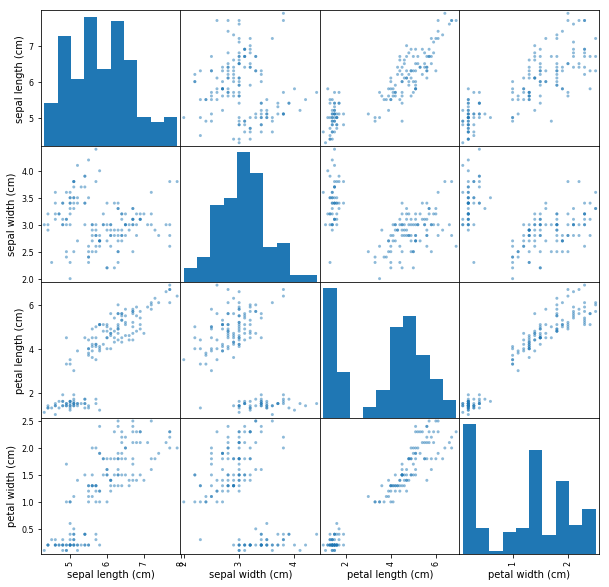

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (10, 10))
plt.show()

In [8]:
from sklearn.cluster import KMeans
X = []
Y = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    X.append(i)
    awcss = kmeans.inertia_/df.shape[0]
    Y.append(awcss)

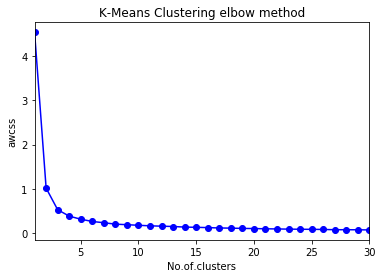

In [9]:
plt.plot(X, Y, 'bo-')
plt.xlim((1, 30))
plt.xlabel('No.of.clusters')
plt.ylabel('awcss')
plt.title('K-Means Clustering elbow method')
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [11]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

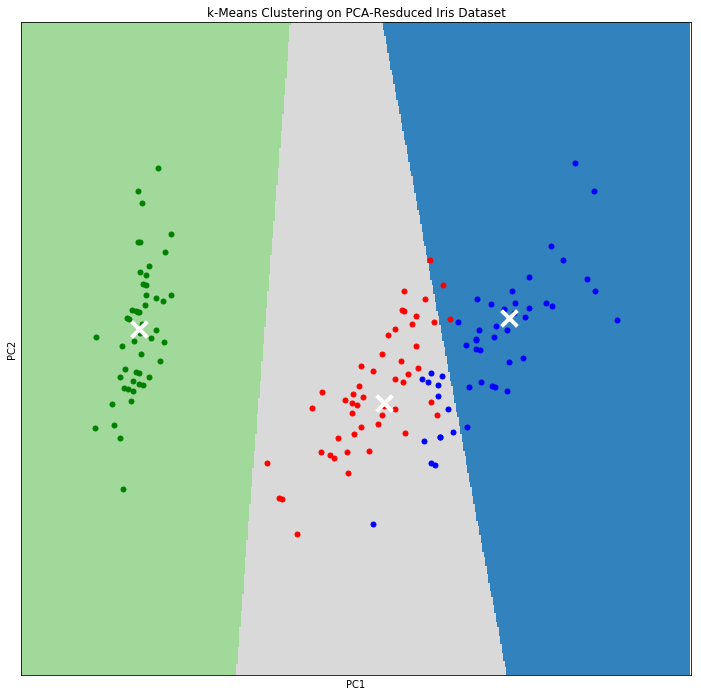

In [14]:
h = .02
x_min, x_max = pc[:, 0].min()-1, pc[:, 0].max()+1
y_min, y_max = pc[:, 1].min()-1, pc[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.tab20c, aspect = 'auto', origin = 'lower')
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4, color = 'w', zorder =10)

plt.title('k-Means Clustering on PCA-Resduced Iris Dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
from sklearn import metrics
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(features)
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)
print('Non-Reduced_Data')
print('Homogeneity : {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness : {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure : {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))
print('PCA Reduced Data')
print('Homogeneity : {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness : {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure : {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

Non-Reduced_Data
Homogeneity : 0.7514854021988338
Completeness : 0.7649861514489815
V-measure : 0.7581756800057784
PCA Reduced Data
Homogeneity : 0.7364192881252849
Completeness : 0.7474865805095324
V-measure : 0.7419116631817836


In [16]:
print(kmeans1.labels_)
print(kmeans2.labels_)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
